In [1]:
# Problem Statement : To predict whether the person is diabetic or not.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
nn=pd.read_csv("pima-indians-diabetes-2.csv")

In [4]:
nn.shape

(768, 9)

In [5]:
nn.head()

Preg  Plas  Pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

In [6]:
nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
nn.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [8]:
nn.describe(include="all")

Preg        Plas        Pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

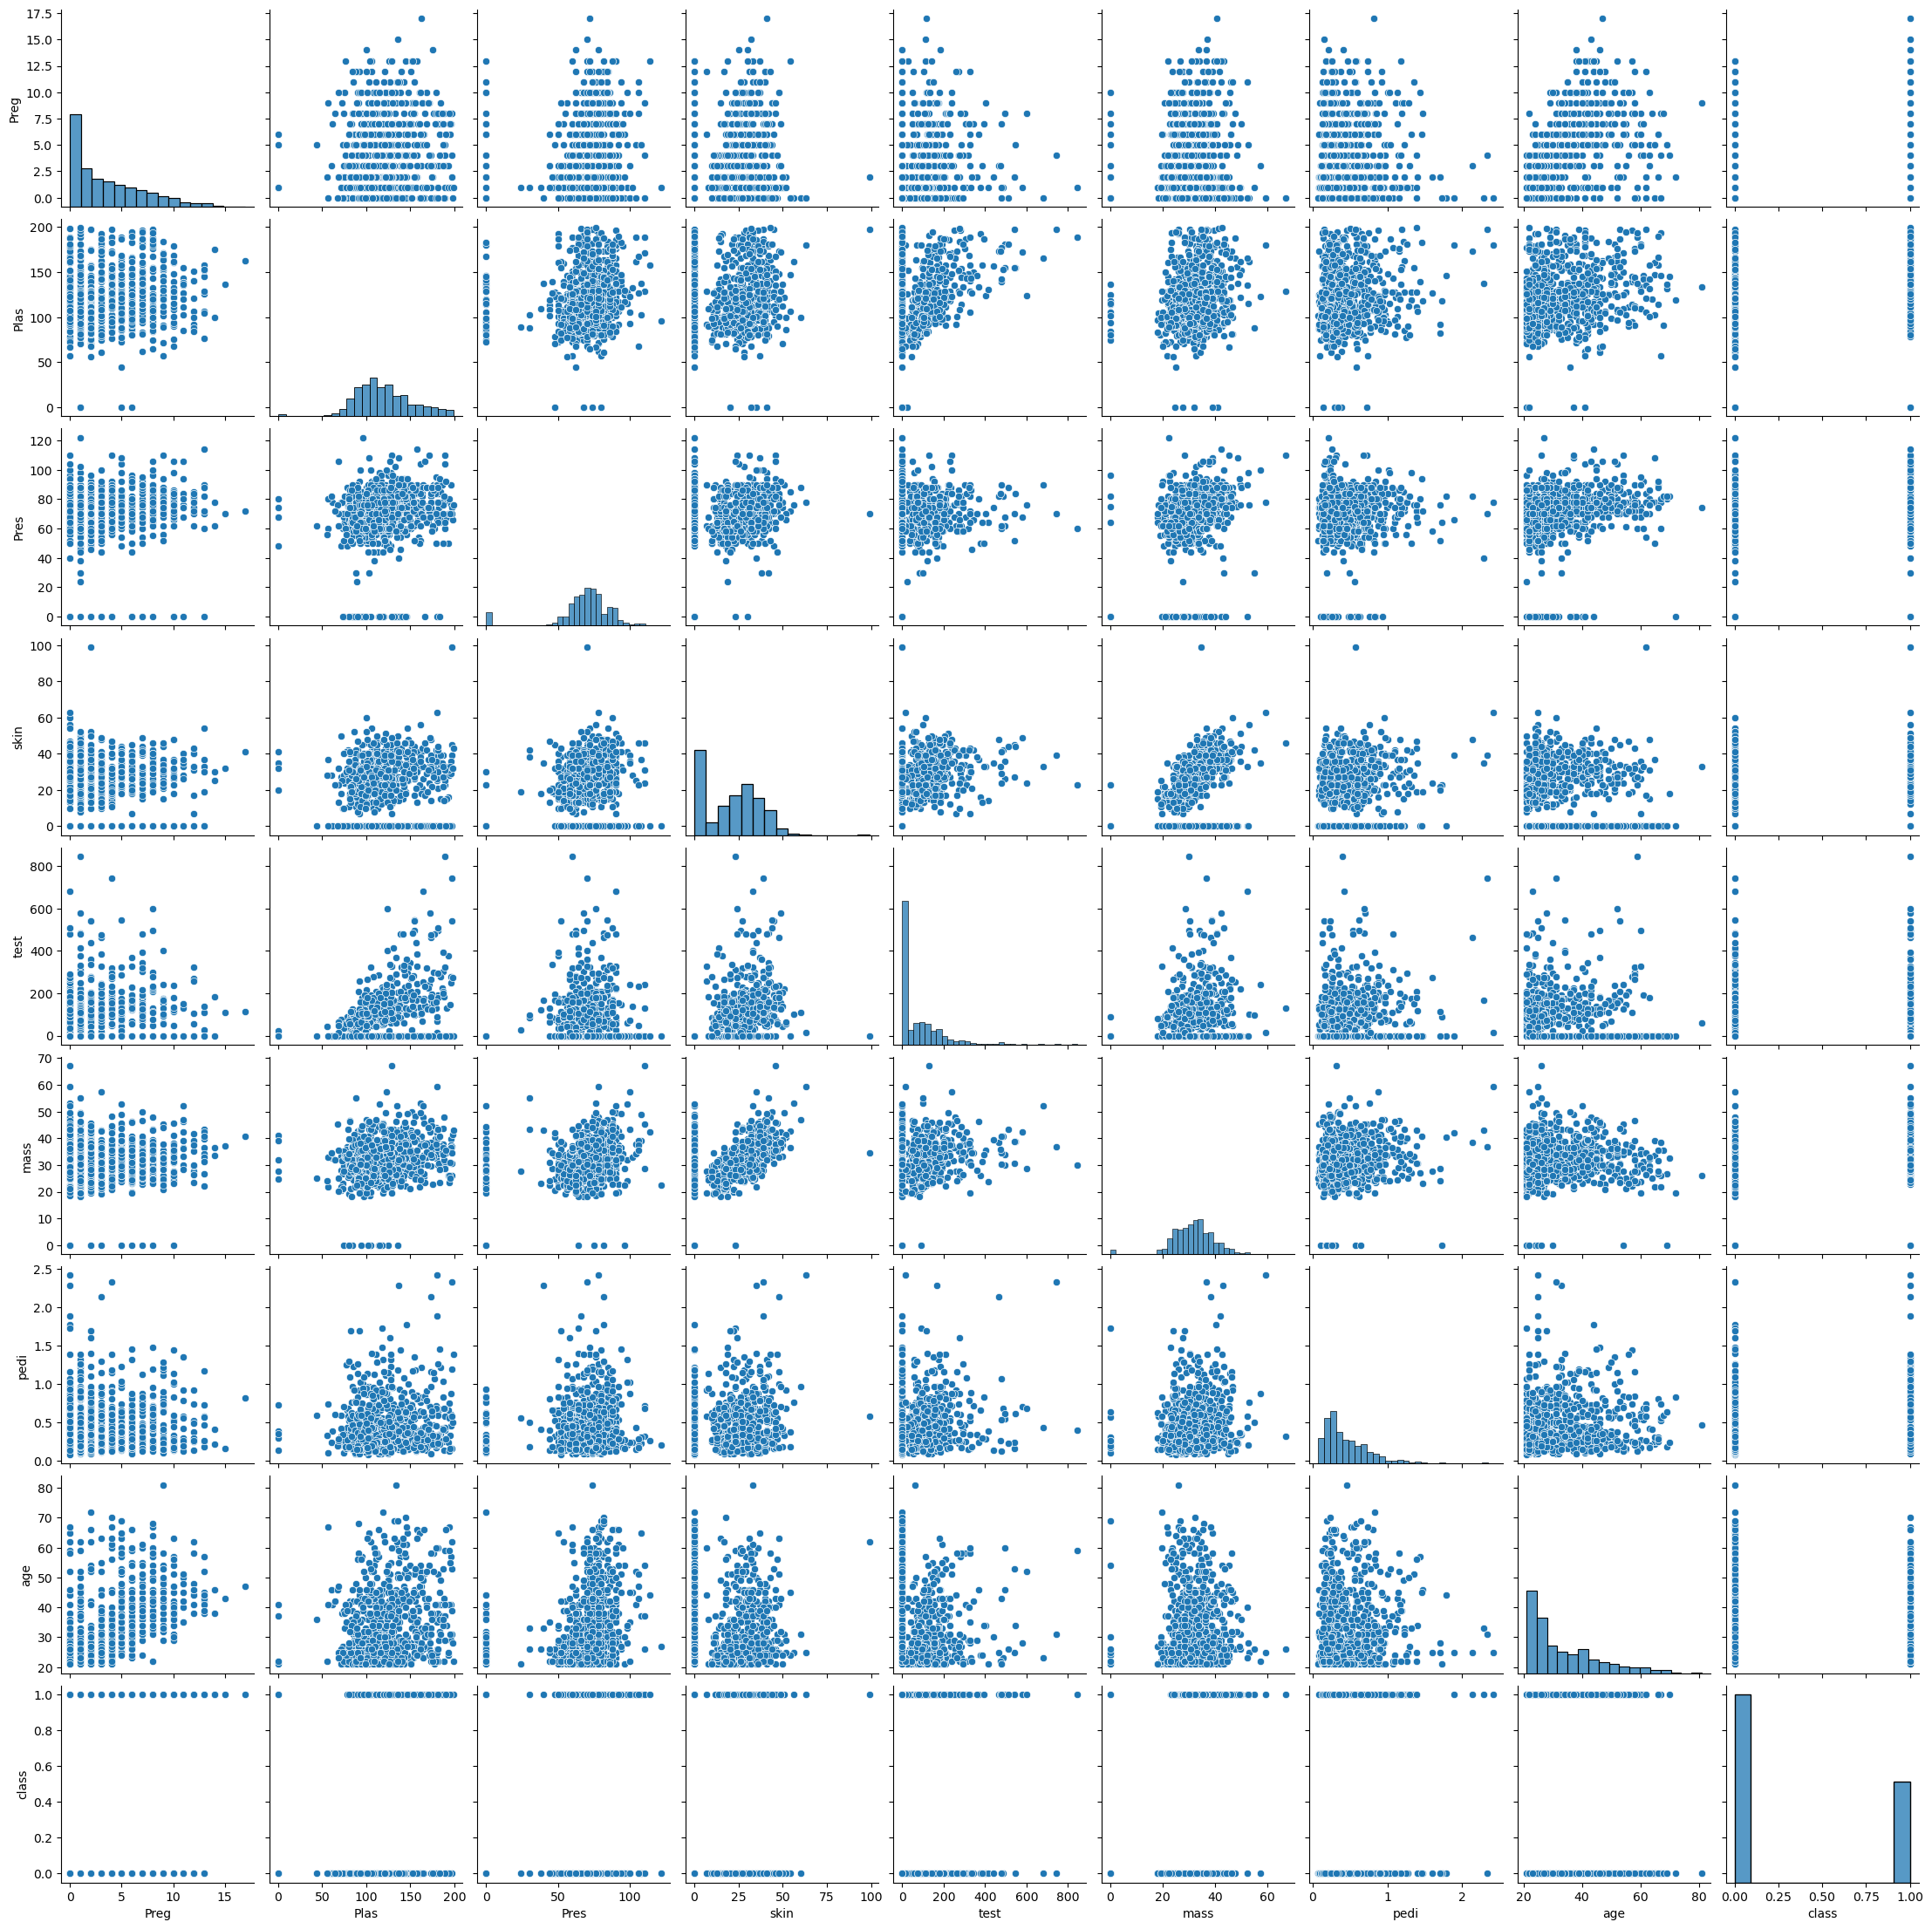

In [9]:
sns.pairplot(nn)

In [10]:
nn.head()

Preg  Plas  Pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

In [11]:
nn["Pres"].value_counts()

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: Pres, dtype: int64

In [12]:
nn["Pres"]=nn["Pres"].replace(0,np.nan)
nn["Pres"]=nn["Pres"].astype(float)
mean1=nn["Pres"].mean()
nn["Pres"].replace(np.nan,mean1,inplace=True)
nn["Pres"].value_counts()

70.000000     57
74.000000     52
78.000000     45
68.000000     45
72.000000     44
64.000000     43
80.000000     40
76.000000     39
60.000000     37
72.405184     35
62.000000     34
66.000000     30
82.000000     30
88.000000     25
84.000000     23
90.000000     22
86.000000     21
58.000000     21
50.000000     13
56.000000     12
52.000000     11
54.000000     11
75.000000      8
92.000000      8
65.000000      7
85.000000      6
94.000000      6
48.000000      5
96.000000      4
44.000000      4
100.000000     3
106.000000     3
98.000000      3
110.000000     3
55.000000      2
108.000000     2
104.000000     2
46.000000      2
30.000000      2
122.000000     1
95.000000      1
102.000000     1
61.000000      1
24.000000      1
38.000000      1
40.000000      1
114.000000     1
Name: Pres, dtype: int64

In [13]:
nn["skin"].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: skin, dtype: int64

In [14]:
nn["skin"]=nn["skin"].replace(0,np.nan)
nn["skin"]=nn["skin"].astype(float)
mean2=nn["skin"].mean()
nn["skin"].replace(np.nan,mean2,inplace=True)
nn["skin"].value_counts()

29.15342    227
32.00000     31
30.00000     27
27.00000     23
23.00000     22
33.00000     20
28.00000     20
18.00000     20
31.00000     19
19.00000     18
39.00000     18
29.00000     17
40.00000     16
25.00000     16
26.00000     16
22.00000     16
37.00000     16
41.00000     15
35.00000     15
36.00000     14
15.00000     14
17.00000     14
20.00000     13
24.00000     12
42.00000     11
13.00000     11
21.00000     10
46.00000      8
34.00000      8
12.00000      7
38.00000      7
11.00000      6
43.00000      6
16.00000      6
45.00000      6
14.00000      6
44.00000      5
10.00000      5
48.00000      4
47.00000      4
49.00000      3
50.00000      3
8.00000       2
7.00000       2
52.00000      2
54.00000      2
63.00000      1
60.00000      1
56.00000      1
51.00000      1
99.00000      1
Name: skin, dtype: int64

In [15]:
nn["test"].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: test, Length: 186, dtype: int64

In [16]:
nn["test"]=nn["test"].replace(0,np.nan)
nn["test"]=nn["test"].astype(float)
mean3=nn["test"].mean()
nn["test"].replace(np.nan,mean3,inplace=True)
nn["test"].value_counts()

155.548223    374
105.000000     11
130.000000      9
140.000000      9
120.000000      8
             ... 
73.000000       1
171.000000      1
255.000000      1
52.000000       1
112.000000      1
Name: test, Length: 186, dtype: int64

In [17]:
nn["mass"].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: mass, Length: 248, dtype: int64

In [18]:
nn["mass"]=nn["mass"].replace(0,np.nan)
nn["mass"]=nn["mass"].astype(float)
mean4=nn["mass"].mean()
nn["mass"].replace(np.nan,mean4,inplace=True)
nn["mass"].value_counts()

32.000000    13
31.600000    12
31.200000    12
32.457464    11
32.400000    10
             ..
36.700000     1
41.800000     1
42.600000     1
42.800000     1
46.300000     1
Name: mass, Length: 248, dtype: int64

In [19]:
nn["pedi"].value_counts()

0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: pedi, Length: 517, dtype: int64

In [20]:
nn["pedi"]=nn["pedi"].replace(0,np.nan)
nn["pedi"]=nn["pedi"].astype(float)
mean5=nn["pedi"].mean()
nn["pedi"].replace(np.nan,mean5,inplace=True)
nn["pedi"].value_counts()

0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: pedi, Length: 517, dtype: int64

In [21]:
X=nn.drop(['class'],axis=1)
y=nn[["class"]]

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
model_5=LogisticRegression()
model_5.fit(X_train,y_train)

LogisticRegression()

In [24]:
model_5.score(X_train,y_train)

0.7858472998137802

In [25]:
model_5.score(X_test,y_test)

0.7359307359307359

In [26]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(X_train,y_train)

SVC()

In [27]:
model_svc.score(X_train,y_train)

0.7728119180633147

In [28]:
model_svc.score(X_test,y_test)

0.7402597402597403